In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
import cv2
from matplotlib import pyplot as plt
from PIL import Image

## Pre Processing Images

In [2]:

images = 'F:\Fingerprint_recog\SOCOFing\Real'
len(os.listdir(images))

def load_img(image):
  img =[]
  for i in sorted(os.listdir(image)):
    img1 = cv2.imread(os.path.join(image,i))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (64, 64))
    img.append(img1)

  return img


In [3]:
preprocessed_images=load_img(images)
preprocessed_images[1].shape


(64, 64)

In [4]:
preprocessed_images = np.array(preprocessed_images)
preprocessed_images=preprocessed_images.reshape((6000,-1))
preprocessed_images[1].shape

(4096,)

In [5]:
preprocessed_images.shape

(6000, 4096)

In [6]:
y_labels = []
gender = []
hand = []
finger = []
for img in sorted(os.listdir(images)):
    temp = img.split('_')
    y_labels.append(temp[0])
    gender.append(temp[2])
    hand.append(temp[3])
    finger.append(temp[4])



In [7]:
print(y_labels[:11])

['100', '100', '100', '100', '100', '100', '100', '100', '100', '100', '101']


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(preprocessed_images,y_labels,random_state=0,test_size =0.20)

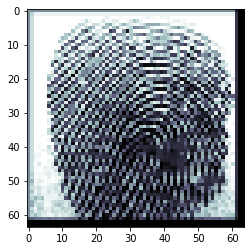

In [9]:
from matplotlib import pyplot as plt
plt.imshow(preprocessed_images[0].reshape(64,64),cmap =plt.cm.bone)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(preprocessed_images)

PCA(n_components=0.9)

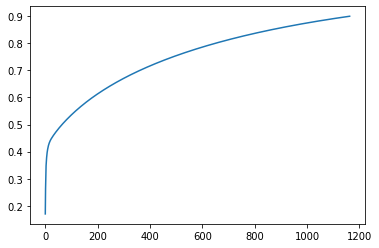

In [11]:
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))

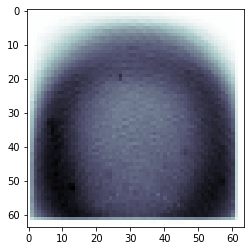

In [12]:
plt.imshow(pca.components_[0].reshape(64,64),cmap =plt.cm.bone)

In [13]:
omega = pca.fit_transform(preprocessed_images)
omega.shape

(6000, 1164)

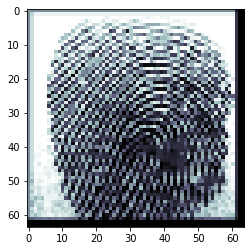

In [14]:
plt.imshow(preprocessed_images[0].reshape(64,64),cmap =plt.cm.bone)

Back to image with important features


In [18]:
projectedFinger = np.dot(omega, pca.components_)
projectedFinger.shape

(6000, 4096)

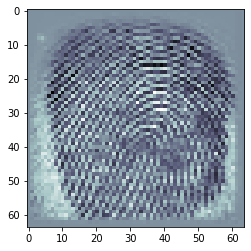

In [19]:
plt.imshow(projectedFinger[0].reshape(64,64),cmap =plt.cm.bone)

In [20]:
x = omega
y = [int(i)-1 for i in y_labels]

Y = np.array(y)
X = np.array(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size =0.20)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
from tensorflow.keras.metrics import CategoricalAccuracy

The below code has been turned into comments. We already know that ANNs don't work great on image data.  
The below code depicts building a feed-forward neural network. This was built using tensorflow and keras. 

In [19]:
#Build Forward propagation
# model=models.Sequential([
#     layers.Dense(512,activation=layers.LeakyReLU()),
#     layers.Dense(128,activation=layers.LeakyReLU()),
#     layers.Dense(600,"softmax")
# ])

In [20]:
##cost
# model.compile(optimizer="rmsprop",
#                 loss="sparse_categorical_crossentropy",
#                 metrics=[CategoricalAccuracy()])

In [21]:
# model.fit(X_train,y_train,epochs=10)

In [22]:

projectedImages2D = projectedFinger.reshape((-1, 64,64))
projectedImages2D.shape

(6000, 64, 64)

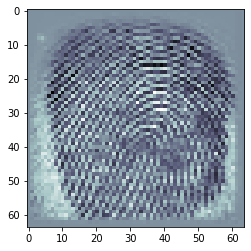

In [23]:
plt.imshow(projectedImages2D[0],cmap = plt.cm.bone)

### CNN model

In [24]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Input
from tensorflow.keras import layers

In [25]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

c:\Users\User\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\client\session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [26]:
# 0. Setting random seed
tf.random.set_seed(42)

# 1. Building the neural network
conv_model = tf.keras.Sequential([
    layers.Input(shape=(64, 64, 1)),
    
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D(),
    
    layers.Conv2D(filters = 32,kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    
    layers.Dense(128,activation='relu'),
    layers.Dense(600,"softmax")
    
])

# 2. Compiling the model
conv_model.compile(optimizer="Adam",
                loss="sparse_categorical_crossentropy",
                metrics=[CategoricalAccuracy()])


# 3. Fitting the model on data
cov_history_0 = conv_model.fit(tf.expand_dims(projectedImages2D, axis=3),Y, epochs = 10, validation_split= 0.25)

Epoch 1/10
141/141 [==============================] - 15s 102ms/step - loss: 6.5787 - categorical_accuracy: 0.0000e+00 - val_loss: 7.9158 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
141/141 [==============================] - 13s 95ms/step - loss: 6.1250 - categorical_accuracy: 0.0000e+00 - val_loss: 9.6556 - val_categorical_accuracy: 6.6667e-04
Epoch 3/10
141/141 [==============================] - 14s 99ms/step - loss: 5.8267 - categorical_accuracy: 6.6667e-04 - val_loss: 11.5805 - val_categorical_accuracy: 0.0053
Epoch 4/10
141/141 [==============================] - 14s 103ms/step - loss: 5.3958 - categorical_accuracy: 0.0013 - val_loss: 15.4026 - val_categorical_accuracy: 0.0013
Epoch 5/10
141/141 [==============================] - 15s 104ms/step - loss: 4.8296 - categorical_accuracy: 0.0013 - val_loss: 16.5348 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
141/141 [==============================] - 15s 105ms/step - loss: 4.1588 - categorical_accuracy: 0.0020 - val_loss: 17.

### CNN model iter 2

In [27]:
# 0. Setting random seed
tf.random.set_seed(42)

# 1. Building the neural network
inputs = layers.Input(shape=(64, 64, 1), name="input_layer")
x = layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', name='conv1')(inputs)
x = layers.Activation('relu', name='conv1_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool1')(x)
x = layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', name='conv2')(x)
x = layers.Activation('relu', name='conv2_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool2')(x)
x = layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', name='conv3')(x)
x = layers.Activation('relu', name='conv3_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool3')(x)
x = layers.Conv2D(128, (5, 5), strides=(1, 1), padding='same', name='conv4')(x)
x = layers.Activation('relu', name='conv4_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool4')(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu', name='fcl1')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu', name='fcl2')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(600, activation='softmax', name='predictions')(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="CNN_model_iter_2")

# 2. Compiling the model
model_2.compile(tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss="sparse_categorical_crossentropy",
                metrics=[CategoricalAccuracy()])

# 3, Creating callbacks
CALLBACKS = [tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)]

# 4. Training the model
conv_history_1 = model_2.fit(tf.expand_dims(projectedImages2D, axis=3),Y, epochs = 25, validation_split= 0.25, callbacks=CALLBACKS)

Epoch 1/25
141/141 [==============================] - 29s 203ms/step - loss: 6.7154 - categorical_accuracy: 8.8889e-04 - val_loss: 6.4262 - val_categorical_accuracy: 0.0000e+00
Epoch 2/25
141/141 [==============================] - 31s 220ms/step - loss: 6.4082 - categorical_accuracy: 4.4444e-04 - val_loss: 6.4784 - val_categorical_accuracy: 0.0000e+00
Epoch 3/25
141/141 [==============================] - 33s 233ms/step - loss: 6.3804 - categorical_accuracy: 0.0013 - val_loss: 6.6799 - val_categorical_accuracy: 0.0000e+00
Epoch 4/25
141/141 [==============================] - 31s 218ms/step - loss: 6.3303 - categorical_accuracy: 2.2222e-04 - val_loss: 6.9413 - val_categorical_accuracy: 0.0000e+00


In [28]:
preprocessed_images.shape

(6000, 4096)

In [29]:
raw_images_reshaped = preprocessed_images.reshape((-1, 64, 64))
raw_images_reshaped.shape

(6000, 64, 64)

In [30]:
# 0. Setting random seed
tf.random.set_seed(42)

# 1. Building the neural network
inputs = layers.Input(shape=(64, 64, 1), name="input_layer")
x = layers.Normalization()(inputs)
x = layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', name='conv1')(x)
x = layers.Activation('relu', name='conv1_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool1')(x)
x = layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', name='conv2')(x)
x = layers.Activation('relu', name='conv2_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool2')(x)
x = layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', name='conv3')(x)
x = layers.Activation('relu', name='conv3_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool3')(x)
x = layers.Conv2D(128, (5, 5), strides=(1, 1), padding='same', name='conv4')(x)
x = layers.Activation('relu', name='conv4_relu')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), padding='valid', name='pool4')(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu', name='fcl1')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu', name='fcl2')(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(600, activation='softmax', name='predictions')(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="CNN_model_iter_2")

# 2. Compiling the model
model_2.compile(tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss="sparse_categorical_crossentropy",
                metrics=[CategoricalAccuracy()])

# 3, Creating callbacks
CALLBACKS = [tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)]

# 4. Training the model
conv_history_1 = model_2.fit(tf.expand_dims(raw_images_reshaped, axis=3),Y, epochs = 25, validation_split= 0.25, callbacks=CALLBACKS)

Epoch 1/25
141/141 [==============================] - 27s 189ms/step - loss: 6.9182 - categorical_accuracy: 0.0000e+00 - val_loss: 6.4319 - val_categorical_accuracy: 0.0000e+00
Epoch 2/25
141/141 [==============================] - 29s 208ms/step - loss: 6.4236 - categorical_accuracy: 8.8889e-04 - val_loss: 6.4305 - val_categorical_accuracy: 6.6667e-04
Epoch 3/25
141/141 [==============================] - 30s 216ms/step - loss: 6.4033 - categorical_accuracy: 0.0071 - val_loss: 6.5528 - val_categorical_accuracy: 0.0000e+00
Epoch 4/25
141/141 [==============================] - 29s 208ms/step - loss: 6.3700 - categorical_accuracy: 2.2222e-04 - val_loss: 6.7133 - val_categorical_accuracy: 0.0000e+00
Epoch 5/25
141/141 [==============================] - 30s 215ms/step - loss: 6.3291 - categorical_accuracy: 0.0000e+00 - val_loss: 6.9402 - val_categorical_accuracy: 0.0000e+00


### Using EfficientNetB0

In [31]:
max(raw_images_reshaped.flatten())

255

In [32]:
# 0. Set random seed
tf.random.set_seed(42)
INPUT_SHAPE = (64, 64, 1)

# 1. Create the model
base_efficient_net_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_efficient_net_model.trainable=False
inputs= layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = layers.BatchNormalization()(inputs)
x = base_efficient_net_model(x)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs=layers.Dense(600,activation="softmax",name="output_layer")(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=outputs, name="model_2_freezed_EfficientNet")

# 2. Compile the model
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer="Adam",
                metrics=[CategoricalAccuracy()])

# 3. Get the summary
model_2.summary()

# 4. Training the model
conv_history_2 = model_2.fit(tf.expand_dims(raw_images_reshaped, axis=3),Y, epochs = 25, validation_split= 0.25, callbacks=CALLBACKS)

16719872/16705208 [==============================] - 3s 0us/step
Model: "model_2_freezed_EfficientNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 64, 64, 1)]       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 1)         4         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 600)               768600    
Total params: 4,818,175
Trainable params: 768,602
Non-trainable params: 4,049,573
_________________________________________________________________
Epoch 1/25
141/141 [===